# MASS ASSEMBLY MODEL

### Print the output of mass assembly

In [53]:
# Read the dataset
import pandas as pd
import os

# Read the dataset
mass_assembly = os.environ['mass_assembly']  # Make sure HOSTLIB is set in your environment
df = pd.read_hdf(os.path.join(mass_assembly, 'output_mass_assembly_adjusted', 'SFHs_alt_0.5_quenched_all_bursts.h5'), key="12000")
#df = pd.read_hdf('/Users/ishfahanirusyda/master_thesis/output_mass_assembly_adjusted/SFHs_alt_0.5_quenched_all_bursts.h5', key="12000")

# Filter rows where t == 0
df_t_zero = df[df['t'] == 0]

# Temporarily adjust display options to show all rows and all columns
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(df_t_zero)  # Display all rows where t == 0

      t    z      age      m_formed  final_age_weights         m_tot
0   0.0  0.0  12000.0  0.000000e+00       0.000000e+00  1.502538e+09
1   0.0  0.0  12000.0  0.000000e+00       0.000000e+00  1.169380e+11
2   0.0  0.0  12000.0  0.000000e+00       0.000000e+00  4.996397e+08
3   0.0  0.0  12000.0  0.000000e+00       0.000000e+00  1.992239e+11
4   0.0  0.0  12000.0  0.000000e+00       0.000000e+00  8.847704e+10
5   0.0  0.0  12000.0  0.000000e+00       0.000000e+00  7.630235e+10
6   0.0  0.0  12000.0  0.000000e+00       0.000000e+00  6.295121e+10
7   0.0  0.0  12000.0  0.000000e+00       0.000000e+00  5.723573e+10
8   0.0  0.0  12000.0  0.000000e+00       0.000000e+00  5.211003e+10
9   0.0  0.0  12000.0  0.000000e+00       0.000000e+00  4.736775e+10
10  0.0  0.0  12000.0  0.000000e+00       0.000000e+00  4.297598e+10
11  0.0  0.0  12000.0  0.000000e+00       0.000000e+00  3.854210e+10
12  0.0  0.0  12000.0  0.000000e+00       0.000000e+00  3.748671e+10
13  0.0  0.0  12000.0  0.000000e+0

## Plot SFR for specific tf

1142283203.9326384


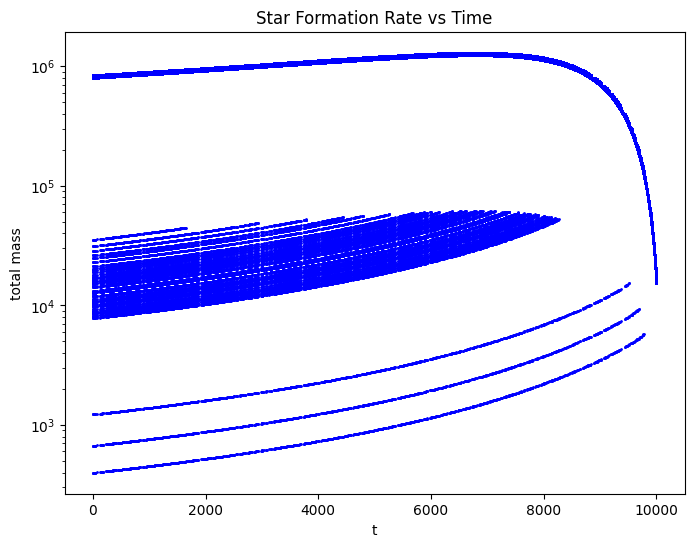

In [54]:
all_mass = []
all_t = []
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loop through each file and extract data
df = pd.read_hdf(os.path.join(mass_assembly, 'output_mass_assembly_adjusted', 'SFHs_alt_0.5_quenched_all_bursts.h5'), key="10000") # Read data from key "main"
m_total= np.max(df['m_tot'].iloc[-1])
print(m_total)
all_mass.extend(df["m_formed"].values)  # Append mass values
all_t.extend(df["t"].values)  # Append time values


# Convert to NumPy arrays
all_mass = np.array(all_mass)
all_t = np.array(all_t)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(df)
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(all_t, all_mass,s=1, color="blue")  # Scatter plot with transparency

# Labels and title
plt.xlabel("t")
plt.ylabel("total mass")
plt.yscale('log')
plt.title("Star Formation Rate vs Time")

# Show plot
plt.show()

## Plot all generated SFH

['1000', '1500', '2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500', '6000', '6500', '7000', '7500', '8000', '8500', '9000', '9500', '10000', '10500', '11000', '11500', '12000', '12500']


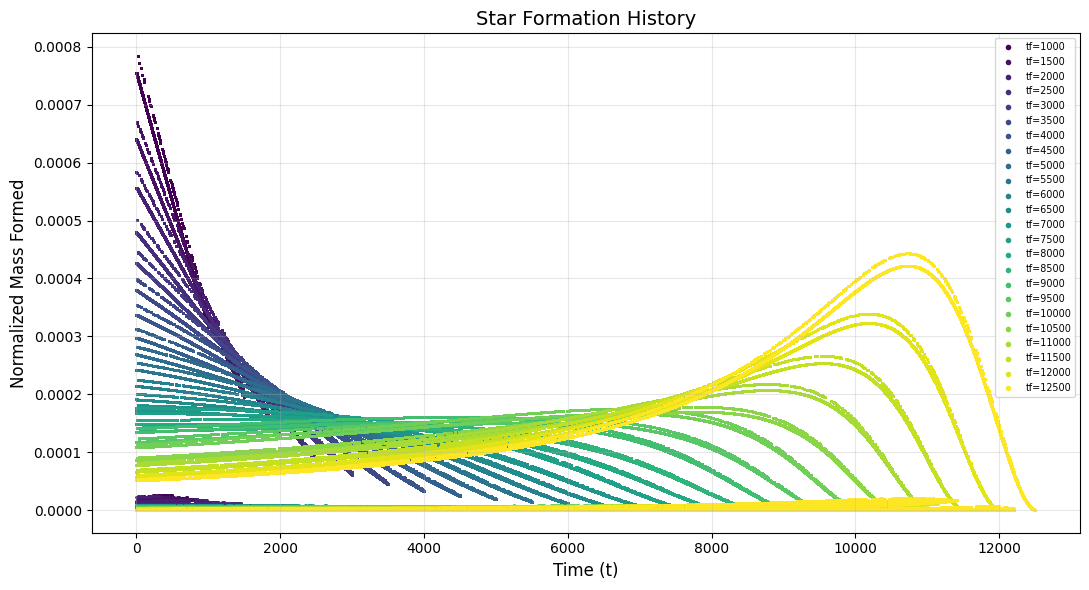

In [55]:
nums = np.arange(1000, 12500, 500)
keys = [ str(n) for n in nums] + ['12500']
print(keys)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(11, 6))  # Make the plot bigger

# Define a colormap to assign different colors for each key
colors = plt.cm.viridis(np.linspace(0, 1, len(keys)))

for i, key in enumerate(keys):
    df_all = pd.read_hdf(os.path.join(mass_assembly, 'output_mass_assembly_adjusted', 'SFHs_alt_0.5_quenched_all_bursts.h5'), key)
    #df_all = pd.read_hdf(os.path.join(mass_assembly, 'output_mass_assembly_adjusted', 'SFHs_alt_0.5_quenched_all_bursts.h5'), key)
    # Filter rows where t == 0
    df_t_zero = df_all[df_all['t'] == 0]

    # Calculate m_tot_averaged for rows where t == 0
    m_tot_averaged = np.mean(df_t_zero['m_tot'])  # normalized by the total mass at the last time step 
    plt.scatter(df_all['t'], df_all['m_formed'] / m_tot_averaged, s=1, color=colors[i], label=f"tf={key}")  # Increase point size

# Add legend
plt.legend(title='', loc="upper right", fontsize="x-small", markerscale=3)  # Smaller legend with larger marker scale

# Add labels and title
plt.xlabel("Time (t)", fontsize=12)
plt.ylabel("Normalized Mass Formed", fontsize=12)
plt.title("Star Formation History", fontsize=14)

plt.grid(alpha=0.3)  
plt.tight_layout() 

# Show the plot
plt.show()

# HOST GALAXY 

/Users/ishfahanirusyda/DES/SIMS/hostlib/output_hostlib/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_3_beta_1.14.h5


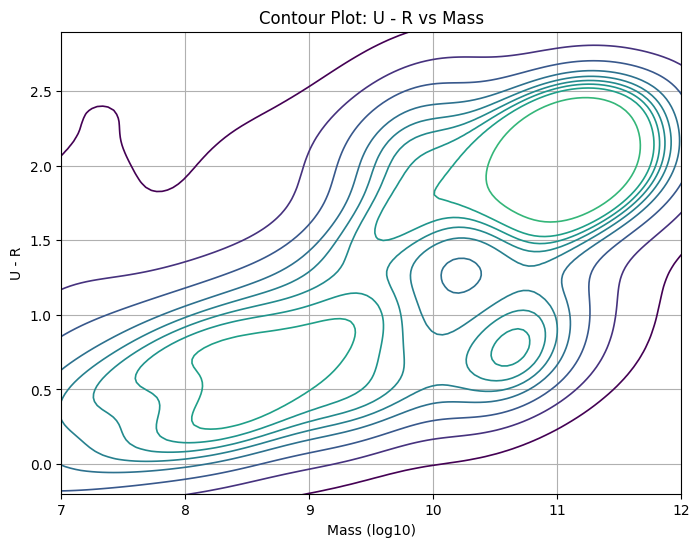

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your HDF5 file
hostlib_path = os.environ['hostlib']  # Make sure HOSTLIB is set in your environment
#file_path = "/Users/ishfahanirusyda/DES/SIMS/hostlib/output_hostlib/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_3_beta_1.14.h5"
file_path = os.path.join(hostlib_path, 'output_hostlib', 'all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_3_beta_1.14.h5')
print(file_path)
# Load the data using the known key
df = pd.read_hdf(file_path, key='main')

# Use log10(mass) and U-R
x = np.log10(df["mass"])
y = df["U_R"]

# Create the contour plot (line contours only)
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=x ,
    y=y,
    cmap="viridis",
    fill=False,       # No color fill
    levels=10,        # Adjust for how many contours you want
    linewidths=1.2    # Thicker lines for visibility
)

# Labels and appearance
plt.xlabel("Mass (log10)")
plt.ylabel("U - R")
plt.xlim(7, 12)
plt.ylim(-0.2, 2.9)
plt.title("Contour Plot: U - R vs Mass")
plt.grid(True)
plt.show()


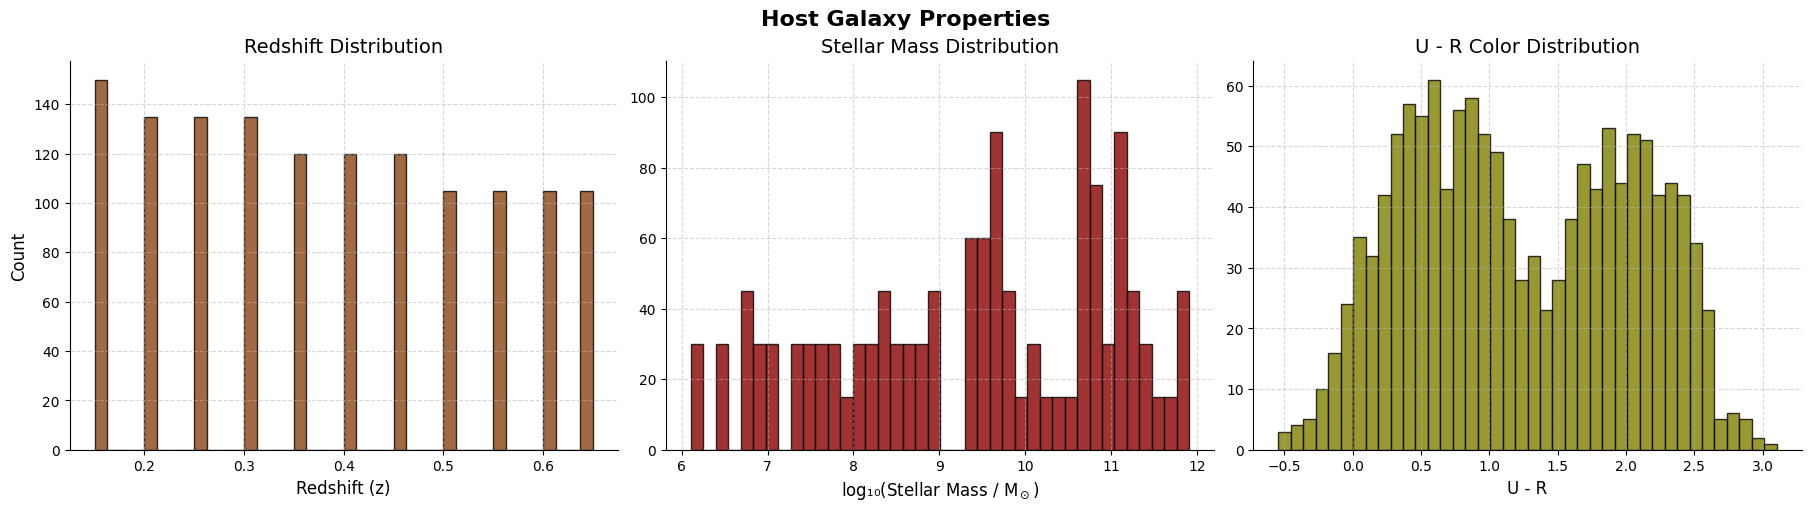

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to your HDF5 file
#file_path = "/Users/ishfahanirusyda/master_thesis/output_hostlib/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_3_beta_1.14.h5"
#file_path = "/Users/ishfahanirusyda/DES/SIMS/hostlib/output_hostlib/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_3_beta_1.14.h5"

# Load the data using the known key
df = pd.read_hdf(file_path, key='main')

# Extract the quantities
redshift = df["z"]
mass = np.log10(df["mass"])  # convert to log scale for better visualization
u_r = df["U_R"]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Redshift histogram
axs[0].hist(redshift, bins=40, color="saddlebrown", edgecolor="black", alpha=0.8)
axs[0].set_xlabel("Redshift (z)", fontsize=12)
axs[0].set_ylabel("Count", fontsize=12)
axs[0].set_title("Redshift Distribution", fontsize=14)
axs[0].grid(True, linestyle="--", alpha=0.5)

# Stellar mass histogram (log scale)
axs[1].hist(mass, bins=40, color="darkred", edgecolor="black", alpha=0.8)
axs[1].set_xlabel("log₁₀(Stellar Mass / M$_\odot$)", fontsize=12)
axs[1].set_title("Stellar Mass Distribution", fontsize=14)
axs[1].grid(True, linestyle="--", alpha=0.5)

# U-R histogram
axs[2].hist(u_r, bins=40, color="olive", edgecolor="black", alpha=0.8)
axs[2].set_xlabel("U - R", fontsize=12)
axs[2].set_title("U - R Color Distribution", fontsize=14)
axs[2].grid(True, linestyle="--", alpha=0.5)

# Optional: Set consistent font and remove top/right spines
for ax in axs:
    ax.tick_params(axis='both', labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.suptitle("Host Galaxy Properties", fontsize=16, weight='bold')
plt.show()


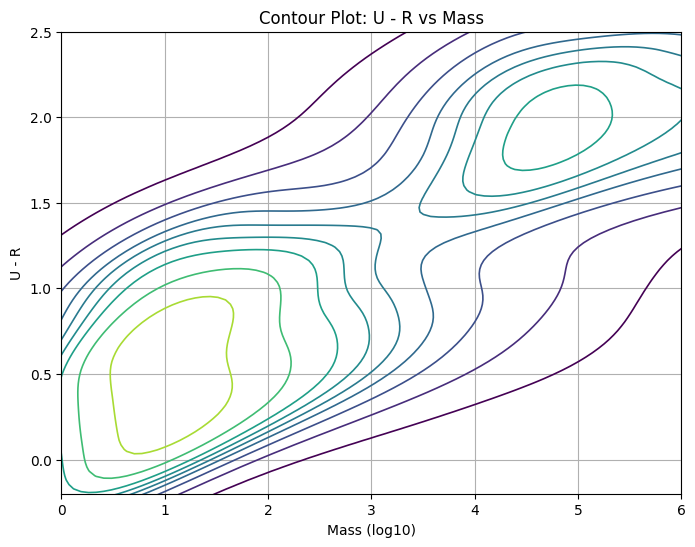

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Directory containing the .h5 files
#folder_path = "/Users/ishfahanirusyda/master_thesis/output_hostlib/"  # Change this to your actual folder path
#folder_path = "/Users/ishfahanirusyda/DES/SIMS/hostlib/output_hostlib/"

# Path to your HDF5 file
#file_path = "/Users/ishfahanirusyda/DES/SIMS/hostlib/output_hostlib/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_3_beta_1.14.h5"

# Load the data using the known key
df = pd.read_hdf(file_path, key='main')

# Use log10(mass) and U-R
x = df["mean_age"]
y = df["U_R"]

# Create the contour plot (line contours only)
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=x/1000 ,
    y=y,
    cmap="viridis",
    fill=False,       # No color fill
    levels=10,        # Adjust for how many contours you want
    linewidths=1.2    # Thicker lines for visibility
)

# Labels and appearance
plt.xlabel("Mass (log10)")
plt.ylabel("U - R")
plt.ylim(-0.2,2.5)
plt.xlim(0,6)
plt.title("Contour Plot: U - R vs Mass")
plt.grid(True)
plt.show()

#

0       2438.367211
1       2438.367211
2       2438.367211
3       2438.367211
4       2438.367211
           ...     
1330    4246.886920
1331    4246.886920
1332    4246.886920
1333    4246.886920
1334    4246.886920
Name: mean_age, Length: 1335, dtype: float64


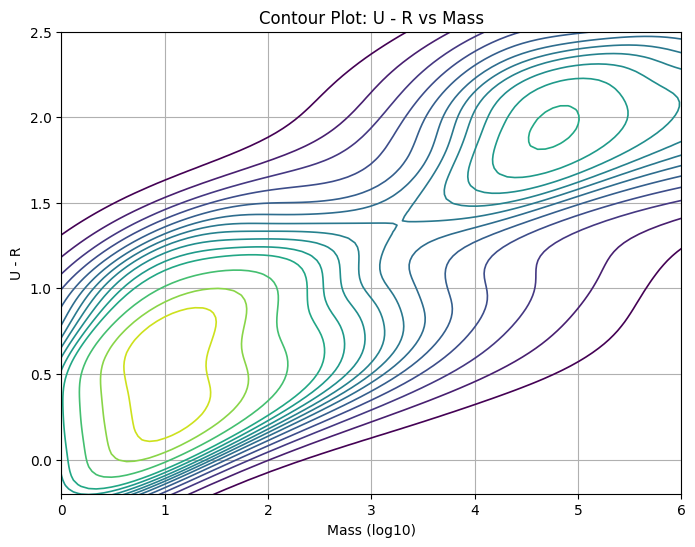

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your HDF5 file
#file_path = "/Users/ishfahanirusyda/master_thesis/output_hostlib/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_3_beta_1.14.h5"
#file_path = "/Users/ishfahanirusyda/DES/SIMS/hostlib/output_hostlib/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_3_beta_1.14.h5"

# Load the data using the known key
df = pd.read_hdf(file_path, key='main')

# Use log10(mass) and U-R
x = df["mean_age"]
y = df["U_R"]
print(x)

# Create the contour plot (line contours only)
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=x/1000,
    y=y,
    cmap="viridis",
    fill=False,       # No color fill
    levels=15,        # Adjust for how many contours you want
    linewidths=1.2    # Thicker lines for visibility
)

# Labels and appearance
plt.xlabel("Mass (log10)")
plt.ylabel("U - R")
plt.ylim(-0.2,2.5)
plt.xlim(0,6)
plt.title("Contour Plot: U - R vs Mass")
plt.grid(True)
plt.show()


## print the output of hostlib

In [63]:
import pandas as pd

# Define the file path
#file_path = "/Users/ishfahanirusyda/master_thesis/output_hostlib/all_model_params_quench_BC03_z0.15000_1.25000_av0.00_1.00_rv_rand_full_age_dists_neb_U-2.00_res_5_beta_1.14_0.30000_5500_sdss_u_r.h5"
#file_path = "/Users/ishfahanirusyda/master_thesis/output_hostlib/all_model_params_quench_BC03_z0.15000_1.25000_av0.00_1.00_rv_rand_full_age_dists_neb_U-2.00_res_5_beta_1.14_combined.h5"
#file_path = "/Users/ishfahanirusyda/master_thesis/output_hostlib/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_3_beta_1.14.h5"
# Read the dataset under the '/main' key
df = pd.read_hdf(file_path, key="/main")

# Print the header (columns)
# Temporarily adjust display options
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

         z          mass          ssfr      mean_age        Av        Rv delta       U_R  pred_rate_x1_hi  pred_rate_x1_lo  pred_rate_total    t_f        m_g        m_r        m_i        m_z                      U                      B                      V                      R                      I                  sdssu                  sdssg                  sdssr                  sdssi                  sdssz                                         galid_spec
0     0.65  4.506045e+10  2.588580e-10   2438.367211  0.000000  4.231555  None  0.293080     7.699189e-03     6.735671e-03     1.453654e-02  11250  21.048607  20.440804  19.906812  19.906414  [-22.474135055820163]  [-22.192497208790364]    [-22.5557233061968]  [-22.894729170837174]  [-23.275180004428172]   [-22.53998986689372]  [-22.331029566663343]  [-22.833069998189714]  [-23.130617892001627]   [-23.45351278171155]  all_model_params_quench_BC03_z_0.65000_rv_rand...
1     0.65  4.506045e+10  2.588580e-10   2438.367211  0.

## Filtering the output to be shown

In [64]:
import pandas as pd
import numpy as np

# Define the file path
#file_path = "/Users/ishfahanirusyda/master_thesis/output_hostlib/all_model_params_quench_BC03_z_rv_rand_full_age_dists_neb_U-2.00_res_3_beta_1.14.h5"

# Read the dataset under the '/main' key
df = pd.read_hdf(file_path, key="/main")

# Apply filters: z ≈ 0.15 and m_r < 24
filtered_df = df[np.isclose(df["z"], 0.3) & (df["m_r"] < 24)]

# Display the filtered rows
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(filtered_df)

# Print total number of rows after filtering
print(f"\nTotal rows after filtering: {len(filtered_df)}")


        z          mass          ssfr     mean_age        Av        Rv delta       U_R  pred_rate_x1_hi  pred_rate_x1_lo  pred_rate_total    t_f        m_g        m_r        m_i        m_z                      U                      B                      V                      R                      I                  sdssu                  sdssg                  sdssr                  sdssi                  sdssz                                         galid_spec
210   0.3  9.031512e+09  6.817012e-13  4752.626693  0.000000  2.399207  None  1.545535         0.000065         0.000540         0.000562  10500  23.048832  21.574041  21.073913  20.789892  [-18.156778586980103]   [-18.49086617093959]  [-19.376506974280776]  [-19.922727287700287]  [-20.532989243542605]  [-18.235332872229023]  [-18.782079408318452]  [-19.780868074946287]  [-20.336018845392832]   [-20.75008733160178]  all_model_params_quench_BC03_z_0.30000_rv_rand...
211   0.3  9.031512e+09  6.817012e-13  4752.626693  0.107143

# SN SIMULATION

## Pint .h5 output of SN simulation

In [69]:
import pandas as pd

# Define the file path

DESSIMS = os.environ['DESSIMS'] 
SN_path= os.path.join(DESSIMS, 'sims', 'SNe', 'for_BBC') # Make sure SN_sim is set in your environment
age_step_Rv_lo_hicut_test = os.path.join(SN_path, 'age_step_Rv_lo_hicut_test')
print(age_step_Rv_lo_hicut_test)

example = os.path.join(age_step_Rv_lo_hicut_test, 'DES_BS20_age_Rv_step_3Gyr_age_x1_beta_1_test_SN_sim_1.50_3.50_0.20.h5')

# Open the HDF5 file and inspect the keys
with pd.HDFStore(example, 'r') as store:
    print("Available keys in the HDF5 file:")
    print(store.keys())  # List all keys in the file

    # Read the first key's data
    key = store.keys()[0]  # Replace with desired key if needed
    df = store[key]

    # Ensure all columns are displayed, but only show the first 5 rows
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 1000)        # Avoid column wrapping
    print(f"\nData under key '{key}' (showing first 5 rows):")
    print(df.head(1000))  # Only print first 5 rows


/Users/ishfahanirusyda/DES/SIMS/sims/SNe/for_BBC/age_step_Rv_lo_hicut_test
Available keys in the HDF5 file:
['/sim']

Data under key '/sim' (showing first 5 rows):
     n    distmod          mass          ssfr        sfr    mean_ages  SN_age        rv         E   host_Av       U-R        m_g        m_r        m_i        m_z eff_mask         c     c_int        x1 prog_age         mB  alpha_SN   beta_SN    mB_err     c_err   c_noise    x1_err  x1_noise    x1_int cov_mB_x1 cov_mB_c cov_x1_c     z
1    5  40.502155  5.433776e+10  3.408063e-13   0.018519  4764.078734  2.4810  1.200000  0.237641  0.857143  2.353016  21.466253  19.835905  19.204706  18.794801        1  0.065735 -0.160729 -0.521362      old  21.483296  0.210012  2.133324  0.031773  0.028254 -0.011176  0.320152  0.793889 -1.315251         0        0        0  0.25
2    5  40.502155  5.433776e+10  3.408063e-13   0.018519  4764.078734  4.9610  2.032517  0.069304  0.107143  1.713918  20.320251  19.017626  18.565568  18.289976     

## Print FITRES file of SN simulation

In [70]:
import pandas as pd

# Path to your FITRES file
example_FITRES= os.path.join(age_step_Rv_lo_hicut_test, 'FITOPT000.FITRES')
#file_path = '/Users/ishfahanirusyda/master_thesis/sims/SNe/for_BBC/age_step_Rv_lo_hicut_test/FITOPT000.FITRES'

# Read the FITRES file, skipping comment lines
df = pd.read_csv(example_FITRES, delim_whitespace=True, comment='#')

# Display the first few rows
print(df.head(1000))


   VARNAMES:  CID  IDSURVEY  TYPE         mB     mBERR      cERR     x1ERR   zHD  TYPE.1  zHDERR  zCMB  zCMBERR  zHEL  zHELERR        x0         x0ERR  COV_x1_x0  COV_c_x0  COV_x1_c  VPEC  VPECERR  PKMJD  PKMJDERR  FITPROB  PROB_SNNTRAINV19_z_TRAINDES_V19  HOST_LOGMASS  HOST_LOG_SFR  HOST_LOG_sSFR    distmod          mass          ssfr        sfr    mean_ages  SN_age        rv         E   host_Av       U-R         c   c_noise     c_int        x1    x1_int  x1_noise
0        SN:    0        10   101  22.152084  0.039003  0.034418  0.301021  0.35     101  0.0001  0.35   0.0001  0.35   0.0001  0.000025  8.882707e-07          0         0         0     0        0  56600       0.1        1                                1     10.752865      0.932080      -9.820785  41.343998  5.660636e+10  1.510828e-10   8.552250  3790.622485  0.1785  1.200000  0.145526  0.321429  0.788170  0.015758 -0.024252 -0.105516  0.187141 -0.242059  0.429200
1        SN:    1        10   101  22.053636  0.025952  0.02

/var/folders/tv/_1cmw5hs0qn_3d7zqjlk3bq00000gn/T/ipykernel_8876/627259733.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(example_FITRES, delim_whitespace=True, comment='#')


## Plot DES and OzDES data

/var/folders/tv/_1cmw5hs0qn_3d7zqjlk3bq00000gn/T/ipykernel_8876/3466116012.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = pd.read_csv(DES_data, delim_whitespace=True, comment='#', names=columns, skiprows=data_start)


Total entries after filtering (zHD ≥ 0.7): 1268
Entries matched with OII data: 581


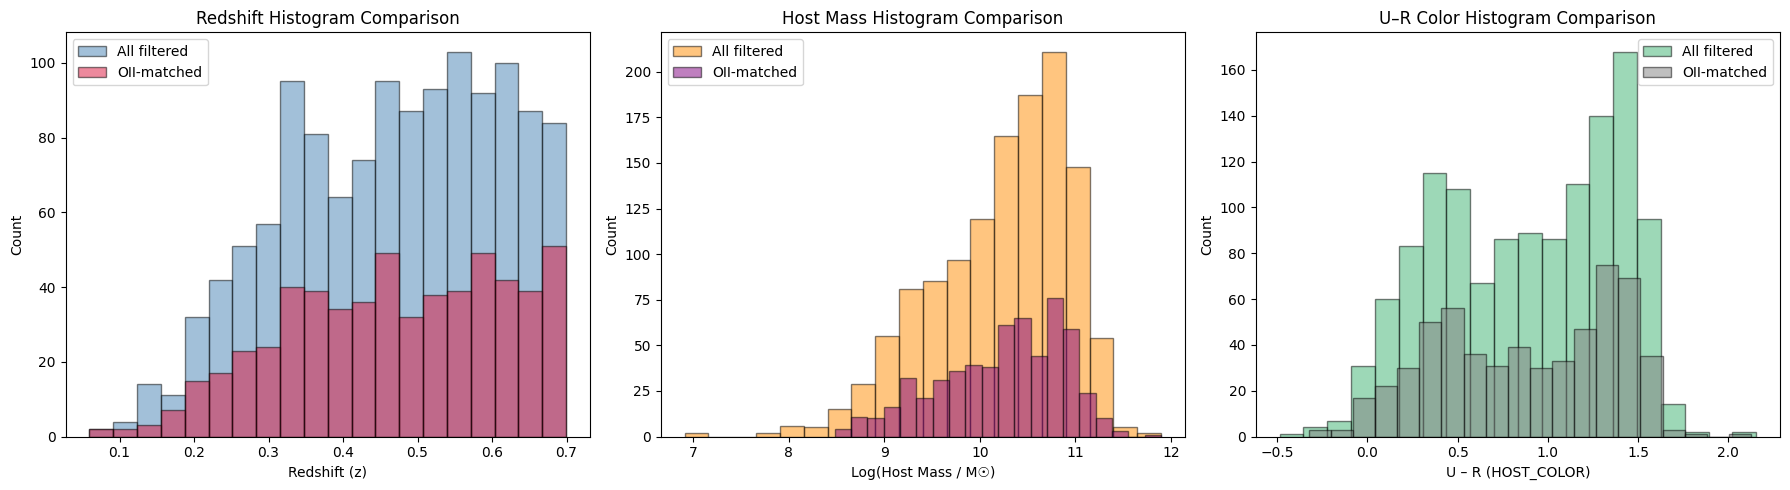

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load FITRES file
DES_data= os.path.join(os.environ['DESSIMS'], 'DES-OzDES_data', 'BBC1D_fixgamma0.FITRES')  # Make sure DES_data is set in your environment
#fitres_path = "/Users/ishfahanirusyda/master_thesis/DES-OzDES_data/BBC1D_fixgamma0.FITRES"

# Detect and read FITRES column headers
with open(DES_data, 'r') as f:
    lines = f.readlines()
for i, line in enumerate(lines):
    if line.startswith("VARNAMES:"):
        columns = line.strip().split()[1:]
        data_start = i + 1
        break

# Read FITRES into df1
df1 = pd.read_csv(DES_data, delim_whitespace=True, comment='#', names=columns, skiprows=data_start)

# Filter data where zHD <= -0.7 (check if this is correct; usually redshift is positive!)
filtered = df1[df1['zHD'] <= 0.7]

# Load the OII data
subDES = os.path.join(os.environ['DESSIMS'], 'DES-OzDES_data', 'ozdes_oII.csv')
df2 = pd.read_csv(subDES)

# Merge on 'CID' (inner join to match only relevant rows)
df_merged = pd.merge(filtered, df2[['CID', 'LOG_OII', 'LOG_OII_ERR', 'SPECZ']], on='CID', how='inner')
# Print counts
print(f"Total entries after filtering (zHD ≥ 0.7): {len(filtered)}")
print(f"Entries matched with OII data: {len(df_merged)}")
# Begin plotting
plt.figure(figsize=(18, 5))

# Redshift comparison
plt.subplot(1, 3, 1)
plt.hist(filtered['zHD'], bins=20, alpha=0.5, label='All filtered', color='steelblue', edgecolor='black')
plt.hist(df_merged['zHD'], bins=20, alpha=0.5, label='OII-matched', color='crimson', edgecolor='black')
plt.xlabel('Redshift (z)')
plt.ylabel('Count')
plt.title('Redshift Histogram Comparison')
plt.legend()

# Host Mass comparison
plt.subplot(1, 3, 2)
plt.hist(filtered['HOST_LOGMASS'], bins=20, alpha=0.5, label='All filtered', color='darkorange', edgecolor='black')
plt.hist(df_merged['HOST_LOGMASS'], bins=20, alpha=0.5, label='OII-matched', color='purple', edgecolor='black')
plt.xlabel('Log(Host Mass / M☉)')
plt.ylabel('Count')
plt.title('Host Mass Histogram Comparison')
plt.legend()

# U-R (HOST_COLOR) comparison
plt.subplot(1, 3, 3)
plt.hist(filtered['HOST_COLOR'], bins=20, alpha=0.5, label='All filtered', color='mediumseagreen', edgecolor='black')
plt.hist(df_merged['HOST_COLOR'], bins=20, alpha=0.5, label='OII-matched', color='gray', edgecolor='black')
plt.xlabel('U – R (HOST_COLOR)')
plt.ylabel('Count')
plt.title('U–R Color Histogram Comparison')
plt.legend()

plt.tight_layout()
plt.show()


## Plot the histogram from simulation

Total weighted SN Ia count: 1378
Total weighted SN with U-R > 1: 405
Total weighted SN with U-R < 1: 973


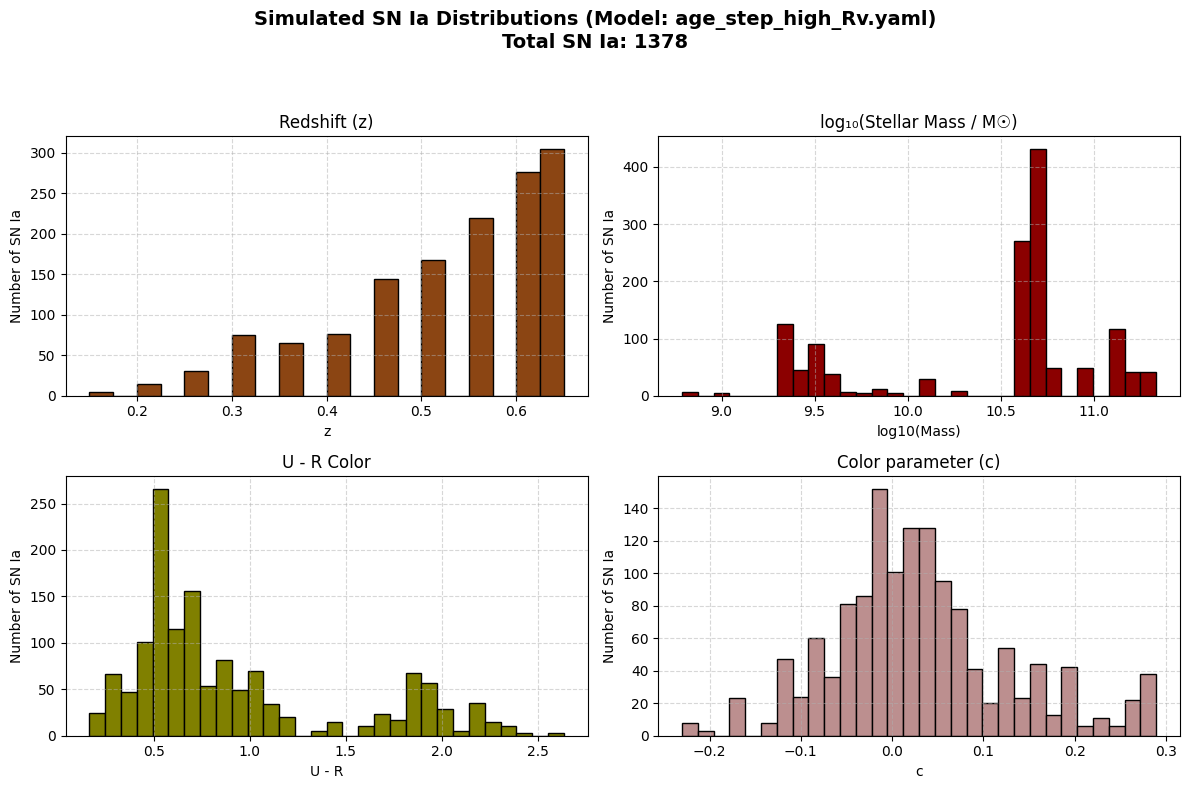

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Directory containing the .h5 files

# Get a list of all .h5 files in the folder
h5_files = glob.glob(os.path.join(age_step_Rv_lo_hicut_test, "*.h5"))

# Initialize lists to collect values
z_list = []
mass_list = []
u_list = []
n_list = []
c_list = []

# Loop through each file and extract unique values
for file in h5_files:
    try:
        df = pd.read_hdf(file, key="/sim")  # Adjust key if needed

        # Drop duplicates by z to ensure uniqueness per file
        df_unique = df.drop_duplicates(subset="z")

        # Collect values
        z_list.extend(df_unique["z"].values)
        mass_list.extend(df_unique["mass"].values)
        u_list.extend(df_unique["U-R"].values)
        n_list.extend(df_unique["n"].values)
        c_list.extend(df_unique["c"].values)

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Convert to numpy arrays
z_array = np.array(z_list)
mass_array = np.array(mass_list)
ur_array = np.array(u_list)
n_array = np.array(n_list)
c_array = np.array(c_list)

# Count SN with U-R > 1 and U-R < 1, weighted by n
sn_ur_gt_1 = np.sum(n_array[ur_array > 1])
sn_ur_lt_1 = np.sum(n_array[ur_array <= 1])
total_sn = np.sum(n_array)

print(f"Total weighted SN Ia count: {total_sn:.0f}")
print(f"Total weighted SN with U-R > 1: {sn_ur_gt_1:.0f}")
print(f"Total weighted SN with U-R < 1: {sn_ur_lt_1:.0f}")

# Plot histograms using n_array as weights
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"Simulated SN Ia Distributions (Model: age_step_high_Rv.yaml)\nTotal SN Ia: {int(total_sn)}", fontsize=14, weight='bold')

# Redshift
axs[0, 0].hist(z_array, bins=20, weights=n_array, color='saddlebrown', edgecolor='black')
axs[0, 0].set_title('Redshift (z)')
axs[0, 0].set_xlabel('z')
axs[0, 0].set_ylabel('Number of SN Ia')
axs[0, 0].grid(True, linestyle='--', alpha=0.5)

# log(Mass)
axs[0, 1].hist(np.log10(mass_array), bins=30, weights=n_array, color='darkred', edgecolor='black')
axs[0, 1].set_title('log₁₀(Stellar Mass / M☉)')
axs[0, 1].set_xlabel('log10(Mass)')
axs[0, 1].set_ylabel('Number of SN Ia')
axs[0, 1].grid(True, linestyle='--', alpha=0.5)

# U-R
axs[1, 0].hist(ur_array, bins=30, weights=n_array, color='olive', edgecolor='black')
axs[1, 0].set_title('U - R Color')
axs[1, 0].set_xlabel('U - R')
axs[1, 0].set_ylabel('Number of SN Ia')
axs[1, 0].grid(True, linestyle='--', alpha=0.5)

# c
axs[1, 1].hist(c_array, bins=30, weights=n_array, color='rosybrown', edgecolor='black')
axs[1, 1].set_title('Color parameter (c)')
axs[1, 1].set_xlabel('c')
axs[1, 1].set_ylabel('Number of SN Ia')
axs[1, 1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


## Compare DES and OzDES data and simulation

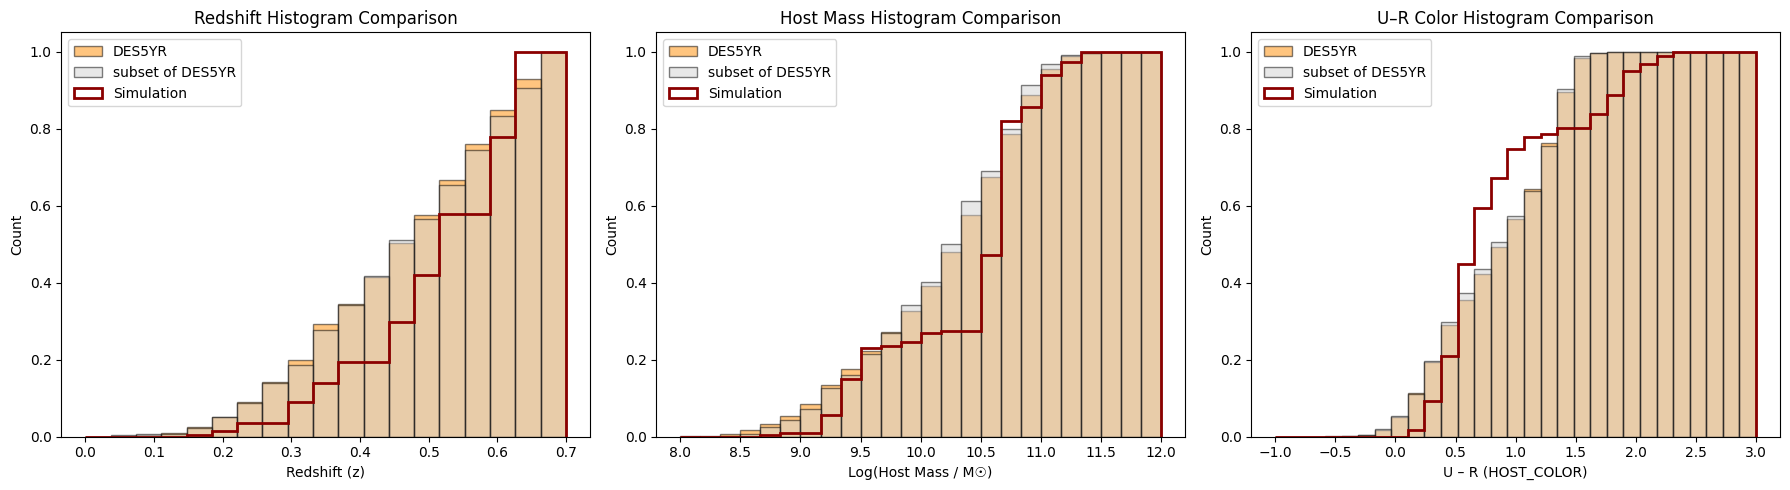

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Begin plotting
plt.figure(figsize=(18, 5))

# Redshift comparison
plt.subplot(1, 3, 1)
bins_z = np.linspace(0, 0.7, 20)
plt.hist(filtered['zHD'], bins=bins_z, alpha=0.5, label='DES5YR', color ='darkorange', edgecolor='black', cumulative=True, density=True)
plt.hist(df_merged['zHD'], bins=bins_z, alpha=0.5, label='subset of DES5YR', color='lightgray', edgecolor='black', cumulative=True, density=True)
plt.hist(z_array, bins=bins_z, histtype='step',weights=n_array, linewidth=2, color='darkred', label='Simulation', cumulative=True, density=True)
plt.xlabel('Redshift (z)')
plt.ylabel('Count')
plt.title('Redshift Histogram Comparison')
plt.legend()

# Host Mass comparison
plt.subplot(1, 3, 2)
bins_mass = np.linspace(8, 12, 25)
plt.hist(filtered['HOST_LOGMASS'], bins=bins_mass, alpha=0.5, label='DES5YR', color='darkorange', edgecolor='black', cumulative=True, density=True)
plt.hist(df_merged['HOST_LOGMASS'], bins=bins_mass, alpha=0.5, label='subset of DES5YR', color='lightgray', edgecolor='black', cumulative=True, density=True)
plt.hist(np.log10(mass_array), bins=bins_mass, weights=n_array, histtype='step', linewidth=2, color='darkred', label='Simulation', cumulative=True, density=True)
plt.xlabel('Log(Host Mass / M☉)')
plt.ylabel('Count')
plt.title('Host Mass Histogram Comparison')
plt.legend()

# U-R comparison
plt.subplot(1, 3, 3)
bins_color = np.linspace(-1, 3, 30)
plt.hist(filtered['HOST_COLOR'], bins=bins_color, alpha=0.5, label='DES5YR', color='darkorange', edgecolor='black', cumulative=True, density=True)
plt.hist(df_merged['HOST_COLOR'], bins=bins_color, alpha=0.5, label='subset of DES5YR', color='lightgray', edgecolor='black', cumulative=True, density=True)
plt.hist(ur_array, bins=bins_color, weights=n_array, histtype='step', linewidth=2, color='darkred', label='Simulation', cumulative=True, density=True)
plt.xlabel('U – R (HOST_COLOR)')
plt.ylabel('Count')
plt.title('U–R Color Histogram Comparison')
plt.legend()

plt.tight_layout()
plt.show()


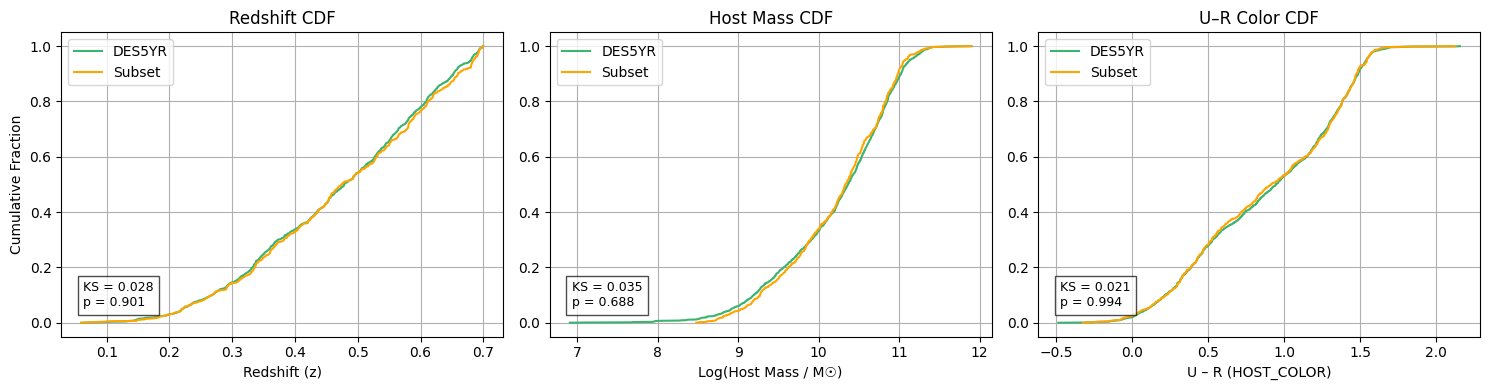

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Prepare data and sort
z_full = np.sort(filtered['zHD'])
z_subset = np.sort(df_merged['zHD'])
z_cdf_full = np.linspace(0, 1, len(z_full))
z_cdf_subset = np.linspace(0, 1, len(z_subset))

mass_full = np.sort(filtered['HOST_LOGMASS'])
mass_subset = np.sort(df_merged['HOST_LOGMASS'])
mass_cdf_full = np.linspace(0, 1, len(mass_full))
mass_cdf_subset = np.linspace(0, 1, len(mass_subset))

color_full = np.sort(filtered['HOST_COLOR'])
color_subset = np.sort(df_merged['HOST_COLOR'])
color_cdf_full = np.linspace(0, 1, len(color_full))
color_cdf_subset = np.linspace(0, 1, len(color_subset))

# KS statistics
ks_z = ks_2samp(filtered['zHD'], df_merged['zHD'])
ks_mass = ks_2samp(filtered['HOST_LOGMASS'], df_merged['HOST_LOGMASS'])
ks_color = ks_2samp(filtered['HOST_COLOR'], df_merged['HOST_COLOR'])

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Redshift
axes[0].plot(z_full, z_cdf_full, label='DES5YR', color='mediumseagreen')
axes[0].plot(z_subset, z_cdf_subset, label='Subset', color='orange')
axes[0].set_xlabel('Redshift (z)')
axes[0].set_ylabel('Cumulative Fraction')
axes[0].set_title('Redshift CDF')
axes[0].legend()
axes[0].grid(True)
axes[0].text(0.05, 0.1, f"KS = {ks_z.statistic:.3f}\np = {ks_z.pvalue:.3f}",
             transform=axes[0].transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

# Host Mass
axes[1].plot(mass_full, mass_cdf_full, label='DES5YR', color='mediumseagreen')
axes[1].plot(mass_subset, mass_cdf_subset, label='Subset', color='orange')
axes[1].set_xlabel('Log(Host Mass / M☉)')
axes[1].set_title('Host Mass CDF')
axes[1].legend()
axes[1].grid(True)
axes[1].text(0.05, 0.1, f"KS = {ks_mass.statistic:.3f}\np = {ks_mass.pvalue:.3f}",
             transform=axes[1].transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

# U–R Color
axes[2].plot(color_full, color_cdf_full, label='DES5YR', color='mediumseagreen')
axes[2].plot(color_subset, color_cdf_subset, label='Subset', color='orange')
axes[2].set_xlabel('U – R (HOST_COLOR)')
axes[2].set_title('U–R Color CDF')
axes[2].legend()
axes[2].grid(True)
axes[2].text(0.05, 0.1, f"KS = {ks_color.statistic:.3f}\np = {ks_color.pvalue:.3f}",
             transform=axes[2].transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()


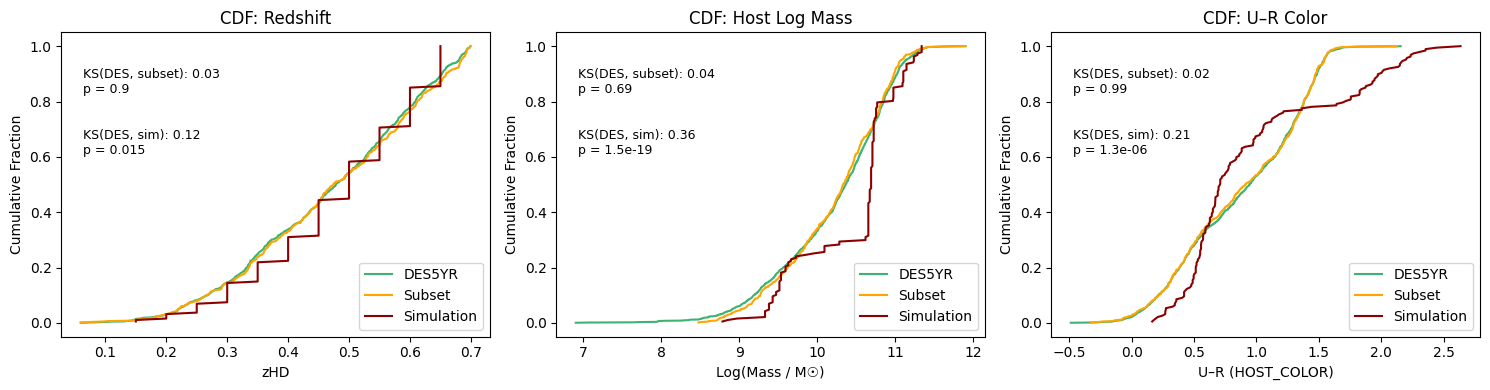

In [77]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import numpy as np

# Extract data arrays
z_des = filtered['zHD']
z_sub = df_merged['zHD']
z_sim = z_array

mass_des = filtered['HOST_LOGMASS']
mass_sub = df_merged['HOST_LOGMASS']
mass_sim = np.log10(mass_array)

color_des = filtered['HOST_COLOR']
color_sub = df_merged['HOST_COLOR']
color_sim = ur_array

def plot_cdf_comparison(ax, data1, data2, data3, label1, label2, label3, title, xlabel):
    # Sort data for CDFs
    d1 = np.sort(data1)
    d2 = np.sort(data2)
    d3 = np.sort(data3)

    # Normalized CDFs
    cdf1 = np.arange(1, len(d1)+1) / len(d1)
    cdf2 = np.arange(1, len(d2)+1) / len(d2)
    cdf3 = np.arange(1, len(d3)+1) / len(d3)

    # Plot
    ax.plot(d1, cdf1, label=label1, color='mediumseagreen')
    ax.plot(d2, cdf2, label=label2, color='orange')
    ax.plot(d3, cdf3, label=label3, color='darkred')

    # KS stats
    ks_12 = ks_2samp(data1, data2)
    ks_13 = ks_2samp(data1, data3)

    # Annotate
    ax.text(0.05, 0.8, f'KS(DES, subset): {ks_12.statistic:.2f}\np = {ks_12.pvalue:.2g}', transform=ax.transAxes, fontsize=9, color='black')
    ax.text(0.05, 0.6, f'KS(DES, sim): {ks_13.statistic:.2f}\np = {ks_13.pvalue:.2g}', transform=ax.transAxes, fontsize=9, color='black')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Cumulative Fraction')
    ax.legend()

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

plot_cdf_comparison(axs[0], z_des, z_sub, z_sim,
                    'DES5YR', 'Subset', 'Simulation',
                    'CDF: Redshift', 'zHD')

plot_cdf_comparison(axs[1], mass_des, mass_sub, mass_sim,
                    'DES5YR', 'Subset', 'Simulation',
                    'CDF: Host Log Mass', 'Log(Mass / M☉)')

plot_cdf_comparison(axs[2], color_des, color_sub, color_sim,
                    'DES5YR', 'Subset', 'Simulation',
                    'CDF: U–R Color', 'U–R (HOST_COLOR)')

plt.tight_layout()
plt.show()
